In [84]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import sys
import csv
import time

# Importing modules
import pandas as pd
import os
import praw
import pandas as pd
import datetime as dt
from elasticsearch import Elasticsearch
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from operator import itemgetter
import math
import datetime
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
import numpy as np
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'hello', 'guys', 'sexy', 'the', 'a', 'an', 'and', 'or', 'but', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'will', 'would', 'shall', 'should', 'can', 'could', 'may', 'might', 'must', 'to', 'of', 'in', 'for', 'on', 'at', 'by', 'from', 'with', 'about', 'as', 'into', 'like', 'through', 'after', 'over', 'between', 'out', 'against', 'during', 'without', 'before', 'under', 'around', 'down', 'off', 'above', 'below', 'up', 'into', 'out', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', '&', 'your', 'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than', 'us', '-', '--', '*', "get", "it's"])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/darientan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# import the webdriver
chrome_options = Options()
chrome_options.headless = False
chrome_options.add_argument("start-maximized")

browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

In [23]:
url = "https://sandboxsg.com/#hackathonlist"
browser.get(url)

In [24]:
# default path to file to store data
path_to_file = "./Sandbox.csv"
# open the file to save the review
csvFile = open(path_to_file, 'w', encoding="utf-8")
fieldnames = ['Hackathon Name', 'Description', 'Host', 'Difficulty', 'Hackathon_type','year']
writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
writer.writeheader()

csvWriter = csv.writer(csvFile)

# Scraping

In [25]:
# default number of scraped pages
store = []

container = browser.find_elements(By.XPATH, "//div[contains(@class, 'col px-3 hackathon-closed hackathon-card')]")
#print(container)

for j in range(len(container)):

    name = container[j].find_element(By.XPATH, ".//h5[contains(@class, 'card-title')]").text
    desc = container[j].find_element(By.XPATH, ".//p[@class='card-text my-2']").text.replace("\n", "  ")
    host = container[j].find_element(By.XPATH, ".//div[@class='mb-3']").text.replace("\n", "  ")
    year = container[j].find_element(By.XPATH, ".//small[@class='text-muted']").text[-4:]
    
    div_rows = container[j].find_element(By.XPATH, ".//div[@class='row-cols-1']")
    rows = div_rows.find_elements(By.XPATH, ".//div[@class = 'mb-3']")
    #print(rows)
    for k in range(len(rows)):
        if k == 0:
            difficulty = rows[k].text
        if k == 1:
            hackathon_type = rows[k].text
    
    
    print("Name; ",name)
    print("Desc: ", desc)
    print("Host: ", host)
    print("Difficulty: ", difficulty)
    print("hackathon_type: ", hackathon_type)
    print("=============================\n")
    csvWriter.writerow([name, desc, host, difficulty,hackathon_type,year])
    csvFile.flush()

    temp_dict = {}
    temp_dict['hackathon'] = name
    temp_dict['description'] = desc
    temp_dict['host'] = host
    temp_dict['difficulty'] = difficulty
    temp_dict['hackathon_type'] = hackathon_type[6:]
    temp_dict['year'] = year

    store.append(temp_dict)


# Go to next page            
#browser.find_element(By.XPATH, './/a[@class="ui_button nav next primary "]').click()

browser.quit()
#csvFile.close()

Name;  DSC Solution Challenge 2021
Desc:  The Google Developer Student Clubs - 2021 Solution Challenge mission is to solve for one or more of the United Nations 17 Sustainable Development Goals using Google technology.
Host:  Google
Difficulty:  Difficulty: Advanced
hackathon_type:  Type: Software Development

Name;  The Data Open 2021
Desc:  Citadel is proud to present The Data Open, a datathon competition taking place throughout the year at a series of top universities. At each event, participants work in teams to work through a large and complex dataset and then present their findings to a panel of judges.
Host:  Citadel
Difficulty:  Difficulty: Advanced
hackathon_type:  Type: Quant

Name;  Shopee Code League 2021
Desc:  Shopee Code League is a 3-week coding challenge consisting of 3 coding competitions open to all students and professionals across the region. The competitions, specially designed by the Shopee tech teams, cover data analytics, data science and algorithmic problems. 

Name;  2021 UAiTED Innovation Competition
Desc:  The 2021 UAiTED Innovation Competition is designed to: Leverage high-tech innovation to facilitate ideas and solutions for problems related to some categories among the 17 Sustainable Development Goals (SDGs) announced by the United Nations (UN). Facilitate cross-regional, multicultural, and interdisciplinary global talent development.
Host:  UAiTED
Difficulty:  Difficulty: Intermediate
hackathon_type:  Type: Innovation

Name;  CODE_EXP 2021
Desc:  Harness the power of mobile app technologies to tackle some of the biggest challenges we face today! Form teams to design and develop solutions that leverage hybrid mobile application and cloud technologies and compete in this exciting hackathon. Online training will be provided on the afternoons of 7, 8, 10 and 11 June to ensure you have an engaging and fruitful Hackathon experience.
Host:  DSTA
Difficulty:  Difficulty: Beginner
hackathon_type:  Type: Mobile App Development

Name;  Cyber Defe

Name;  Singapore Airlines AppChallenge 2021
Desc:  Shortlisted teams will receive dedicated mentoring sessions from aviation experts, business coaches and a chance to pitch their ideas to Singapore Airlines senior management who will be part of the judging panel. Up to 500,000 KrisFlyer Miles and Singapore Airlines Merchandise to be won.
Host:  Singapore Airlines
Difficulty:  Difficulty: Intermediate
hackathon_type:  Type: Solution Development

Name;  Virtual Accounting Innovation Challenge 2021
Desc:  Showcase your skills and creativity and create a solution to solve the business issues faced by accounting professionals in the region's biggest accounting hackathon. Come build the future of accounting!
Host:  Singapore Accountancy Commission
Difficulty:  Difficulty: Intermediate
hackathon_type:  Type: Accounting

Name;  What The Hack: Environment
Desc:  What The Hack is SUTD's annual hackathon that aims to bring together people of various disciplines and provide them with a platform to

Name;  NUS Data Analytics Competition 2022
Desc:  The Data Analytics Competition (DAC) 2022 is a data analytics competition organised by the NUS Statistics and Data Science Society. DAC2022 is for people of varying skill levels to learn how to explore and better appreciate data.
Host:  NUS SDS
Difficulty:  Difficulty: Beginner
hackathon_type:  Type: Product Development

Name;  hacksingapore
Desc:  Enter the world of hacksingapore (also known as hacksg), a nationwide hackathon that brings together a community to tackle problems through emerging technologies — Blockchain, No-Code & Gaming. This is your chance to develop skills, explore new technologies, and test new innovative ideas to propel Singapore’s tech ecosystem forward. This January, we invite change-makers all over the country to join us from Wednesday, 5 January to Sunday, 3 April 2022 for a hybrid hackathon catered to technical & non-technical talents. Throughout the hackathon, hackers will have access to mentorship and worksh

Name;  NSCC HPC Innovation Challenge for the Environment 2022
Desc:  The High-Performance Computing Innovation Challenge for the Environment by NSCC provides innovators an opportunity to access their resources and build transformational solutions, to address one or more of the following statements for our environment
Host:  NSCC
Difficulty:  Difficulty: Intermediate
hackathon_type:  Type: High-Performance Computing

Name;  SMU LIT Hackathon 2022
Desc:  Don’t miss this chance to join the SMU LIT Hackathon taking place from 1-3 July 2022! The Hackathon will be conducted in a hybrid format, with the first 2 days held virtually and the 3rd day held physically at SMU Ngee Ann Kongsi Auditorium. You will get to: - Learn basic legal technology skills from our pre-hackathon workshops - Stand a chance to win over $10,000 worth of cash prizes - Network with leading legal industry experts from Norton Rose Fulbright, Rajah & Tann Technologies, Dentons Rodyk, Clifford Chance and more - Attend insig

In [26]:
from elasticsearch import Elasticsearch
es = Elasticsearch('http://localhost:9200')
es.indices.delete(index='sandbox', ignore=[400,404])
es.indices.create(index='sandbox', body={
    "mappings":{
        "properties":{
            "hackathon":{
                "type":"text",
                "fields": {
                    "keyword": {
                        "type": "keyword",
                    }
                }
            },
            "description":{
                "type":"text",
                "fields": {
                    "keyword": {
                        "type": "keyword",
                    }
                }
            },
            "hosts":{
                "type":"text",
                "fields": {
                    "keyword": {
                        "type": "keyword",
                    }
                }
            },
            "difficulty":{
                "type":"text",
                "fields": {
                    "keyword": {
                        "type": "keyword",
                    }
                }
            },
            "hackathon_type":{
                "type":"text",
                "fields": {
                    "keyword": {
                        "type": "keyword",
                    }
                }
            },
            "year":{
                "type":"text",
                "fields": {
                    "keyword": {
                        "type": "keyword",
                    }
                }
            },
            
        }
    }
})

# insert keywordbags into elasticsearch
elastic_id = 1
for i in store:
    print(i['hackathon'])
    es.index(index='sandbox', id=elastic_id, body=i)
    elastic_id += 1

/var/folders/2n/yj7152_111l7b3hbblxv9pjc0000gn/T/ipykernel_58076/3902387521.py:3: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  es.indices.delete(index='sandbox', ignore=[400,404])
/var/folders/2n/yj7152_111l7b3hbblxv9pjc0000gn/T/ipykernel_58076/3902387521.py:3: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  es.indices.delete(index='sandbox', ignore=[400,404])
/var/folders/2n/yj7152_111l7b3hbblxv9pjc0000gn/T/ipykernel_58076/3902387521.py:4: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  es.indices.create(index='sandbox', body={
/var/folders/2n/yj7152_111l7b3hbblxv9pjc0000gn/T/ipykernel_58076/3902387521.py:4: Elastics

DSC Solution Challenge 2021
The Data Open 2021
Shopee Code League 2021
AIfinity Hackathon
iNTUition V7.0
DSO-NUS CTF 2021
Google Hashcode 2021
Microsoft Azure Virtual Hackathon 2021
IdeasJam 2021
Dyson-NTU Innovation Challenge 2021
ASEAN-India Hackathon 2021
Shopee UltraHackathon 2021
Google Codejam 2021
Innolympics 2021
Hack For Good 2021
2021 Better Working World Data Challenge
2021 UAiTED Innovation Competition
CODE_EXP 2021
Cyber Defenders Discovery Camp 2021
XRperience 2021
Hack Alliance 2021
Lifesavers' Innovation Challenge 2021
SDG Open Hack Singapore 2021
Starburst x NTU NTC Hackathon
Data Mover Challenge 2021
Global Youth Challenge
Seagate CORTX Integration Challenge: Singapore
Engineering Innovation Challenge 2021
Build On, ASEAN 2021
CodeFiesta 2021
SMU LIT Hackathon 2021
Facebook Hacker Cup 2021
Citi HackOverflow 2021
Asean Green Research Hackathon
PSA Hackathon 2021
MSC Maritime Digital Challenge 2021
Singapore Airlines AppChallenge 2021
Virtual Accounting Innovation Chall

# Topic Modelling

In [97]:
# Importing modules
import pandas as pd
import os

# Read data
data = pd.read_csv('./sandbox.csv', encoding='utf-8')

data.head()

,Hackathon Name,Description,Host,Difficulty,Hackathon_type,year
0,DSC Solution Challenge 2021,The Google Developer Student Clubs - 2021 Solu...,Google,Difficulty: Advanced,Type: Software Development,2021
1,The Data Open 2021,"Citadel is proud to present The Data Open, a d...",Citadel,Difficulty: Advanced,Type: Quant,2021
2,Shopee Code League 2021,Shopee Code League is a 3-week coding challeng...,Shopee,Difficulty: Beginner,Type: Data Science,2021
3,AIfinity Hackathon,Want to apply Machine Learning and Artificial ...,MLDA / NTU,Difficulty: Beginner,Type: Machine Learning,2021
4,iNTUition V7.0,IEEE NTU Student Branch is pleased to announce...,IEEE / NTU,Difficulty: Beginner,Type: Product Development,2021


In [98]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/darientan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/darientan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/darientan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [99]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [100]:
#Tokenize words
all_filtered_sentence = []
for d in data['Description']:
    # Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",d)
    #Tokenization
    word_list = nltk.word_tokenize(review_text)
    #print (word_list)
    
    # Lemmatize list of words
    lemmatized_output = [lemmatizer.lemmatize(w) for w in word_list]
    #print(lemmatized_output)
    
    stops = set(stopwords.words("english"))  
    
    filtered_sentence = ' '.join([w for w in lemmatized_output if not w.lower() in stops])
    all_filtered_sentence.append(filtered_sentence)
 
    print(filtered_sentence)

data['description_filtered'] = all_filtered_sentence

Google Developer Student Clubs Solution Challenge mission solve one United Nations Sustainable Development Goals using Google technology
Citadel proud present Data Open datathon competition taking place throughout year series top university event participant work team work large complex dataset present finding panel judge
Shopee Code League week coding challenge consisting coding competition open student professional across region competition specially designed Shopee tech team cover data analytics data science algorithmic problem Participants must analyse datasets draw insightful conclusion solve problem specified amount time
Want apply Machine Learning Artificial Intelligence cool idea meaningful project Join AIfinity hour virtual Hackathon organized MLDA EEE push boundary Machine Learning Artificial Intelligence
IEEE NTU Student Branch pleased announce latest edition flagship hour hackathon iNTUition v iNTUition one largest student run hackathons across South East Asia offering toda

In [107]:
data.to_csv('Sandbox_Filtered.csv', encoding='utf-8')

In [106]:
data.head()

,Hackathon Name,Description,Hackathon_type,year,description_filtered
0,DSC Solution Challenge 2021,The Google Developer Student Clubs - 2021 Solu...,Type: Software Development,2021,Google Developer Student Clubs Solution Challe...
1,The Data Open 2021,"Citadel is proud to present The Data Open, a d...",Type: Quant,2021,Citadel proud present Data Open datathon compe...
2,Shopee Code League 2021,Shopee Code League is a 3-week coding challeng...,Type: Data Science,2021,Shopee Code League week coding challenge consi...
3,AIfinity Hackathon,Want to apply Machine Learning and Artificial ...,Type: Machine Learning,2021,Want apply Machine Learning Artificial Intelli...
4,iNTUition V7.0,IEEE NTU Student Branch is pleased to announce...,Type: Product Development,2021,IEEE NTU Student Branch pleased announce lates...


In [103]:
#Data Cleaning
# Remove the columns
data = data.drop(columns=['Host', 'Difficulty'], axis=1)

# Print out the first rows of data
data.head()

,Hackathon Name,Description,Hackathon_type,year,description_filtered
0,DSC Solution Challenge 2021,The Google Developer Student Clubs - 2021 Solu...,Type: Software Development,2021,Google Developer Student Clubs Solution Challe...
1,The Data Open 2021,"Citadel is proud to present The Data Open, a d...",Type: Quant,2021,Citadel proud present Data Open datathon compe...
2,Shopee Code League 2021,Shopee Code League is a 3-week coding challeng...,Type: Data Science,2021,Shopee Code League week coding challenge consi...
3,AIfinity Hackathon,Want to apply Machine Learning and Artificial ...,Type: Machine Learning,2021,Want apply Machine Learning Artificial Intelli...
4,iNTUition V7.0,IEEE NTU Student Branch is pleased to announce...,Type: Product Development,2021,IEEE NTU Student Branch pleased announce lates...


In [79]:
# Load the regular expression library
import re

# Remove punctuation
data['description_processed'] = data['description_filtered'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
data['description_processed'] = data['description_processed'].map(lambda x: x.lower())

# Print out the first rows
data['description_processed'].head()

0    google developer student clubs solution challe...
1    citadel proud present data open datathon compe...
2    shopee code league week coding challenge consi...
3    want apply machine learning artificial intelli...
4    ieee ntu student branch pleased announce lates...
Name: description_processed, dtype: object

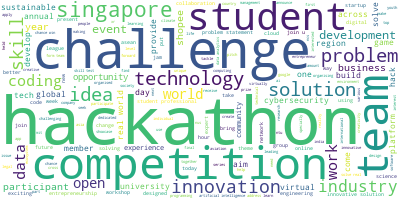

In [80]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data['description_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

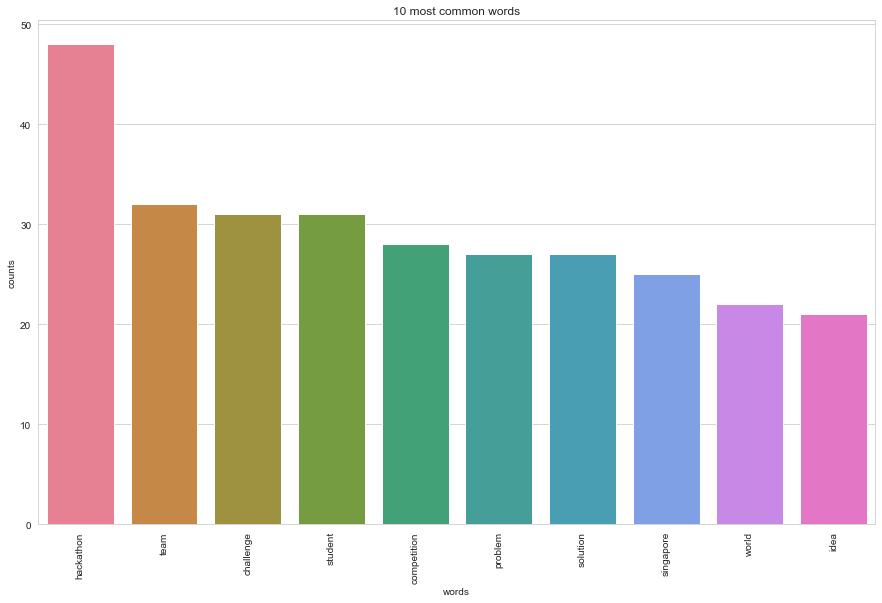

In [81]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['description_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [85]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words]for doc in texts]

In [86]:

df = data
# clean dataframe of title and body
da = df['description_processed'].values.tolist()
data_words = list(sent_to_words(da))# remove stop words
data_words = remove_stopwords(data_words)
df['description_processed2'] = data_words
df

,Hackathon Name,Description,Hackathon_type,year,description_filtered,description_processed,description_processed2
0,DSC Solution Challenge 2021,The Google Developer Student Clubs - 2021 Solu...,Type: Software Development,2021,Google Developer Student Clubs Solution Challe...,google developer student clubs solution challe...,"[google, developer, student, clubs, solution, ..."
1,The Data Open 2021,"Citadel is proud to present The Data Open, a d...",Type: Quant,2021,Citadel proud present Data Open datathon compe...,citadel proud present data open datathon compe...,"[citadel, proud, present, data, open, datathon..."
2,Shopee Code League 2021,Shopee Code League is a 3-week coding challeng...,Type: Data Science,2021,Shopee Code League week coding challenge consi...,shopee code league week coding challenge consi...,"[shopee, code, league, week, coding, challenge..."
3,AIfinity Hackathon,Want to apply Machine Learning and Artificial ...,Type: Machine Learning,2021,Want apply Machine Learning Artificial Intelli...,want apply machine learning artificial intelli...,"[want, apply, machine, learning, artificial, i..."
4,iNTUition V7.0,IEEE NTU Student Branch is pleased to announce...,Type: Product Development,2021,IEEE NTU Student Branch pleased announce lates...,ieee ntu student branch pleased announce lates...,"[ieee, ntu, student, branch, pleased, announce..."
...,...,...,...,...,...,...,...
79,Seagate Lyve Innovator of the Year 2022,"Calling startups and entrepreneurs, take the s...",Type: Innovation,2022,Calling startup entrepreneur take stage Lyve L...,calling startup entrepreneur take stage lyve l...,"[calling, startup, entrepreneur, take, stage, ..."
80,PSA Code Sprint 2022,PSA proudly presents PSA Hackathon 2022 ! Come...,Type: Solution Development,2022,PSA proudly present PSA Hackathon Come join u ...,psa proudly present psa hackathon come join u ...,"[psa, proudly, present, psa, hackathon, come, ..."
81,Digital Futurist Challenge 2022,The Digital Futurist Challenge calls out to al...,Type: Innovation,2022,Digital Futurist Challenge call youth seek mak...,digital futurist challenge call youth seek mak...,"[digital, futurist, challenge, call, youth, se..."
82,NCS Next Hack 2022,NCS Group is delighted to announce the launch ...,Type: Innovation,2022,NCS Group delighted announce launch latest edi...,ncs group delighted announce launch latest edi...,"[ncs, group, delighted, announce, launch, late..."


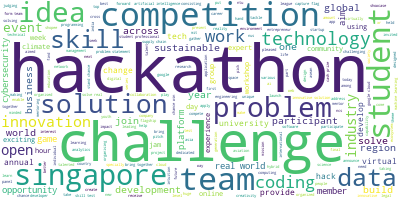

In [87]:
from wordcloud import WordCloud# Join the different processed titles together.
#join title and body
# long_string = ','.join(list(df['title'].values))
long_string = ''
for i in range(len(df['description_processed2'])):
    long_string += ','.join(df['description_processed2'][i])

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [88]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View

from pprint import pprint# number of topics
num_topics = 10# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"challenge" + 0.015*"student" + 0.012*"team" + 0.012*"hackathon" + '
  '0.012*"skill" + 0.009*"competition" + 0.009*"test" + 0.008*"opportunity" + '
  '0.008*"cybersecurity" + 0.008*"put"'),
 (1,
  '0.017*"hackathon" + 0.015*"idea" + 0.009*"artificial" + '
  '0.009*"intelligence" + 0.008*"chain" + 0.008*"exciting" + 0.008*"join" + '
  '0.007*"industry" + 0.007*"technology" + 0.007*"come"'),
 (2,
  '0.014*"singapore" + 0.010*"competition" + 0.010*"hackathon" + '
  '0.010*"solution" + 0.009*"challenge" + 0.009*"insurance" + 0.007*"game" + '
  '0.007*"jam" + 0.007*"virtual" + 0.007*"help"'),
 (3,
  '0.018*"competition" + 0.015*"team" + 0.014*"hackathon" + 0.011*"singapore" '
  '+ 0.010*"student" + 0.009*"cybersecurity" + 0.009*"world" + '
  '0.008*"professional" + 0.008*"work" + 0.008*"event"'),
 (4,
  '0.018*"hackathon" + 0.012*"singapore" + 0.011*"climate" + 0.010*"team" + '
  '0.010*"solution" + 0.009*"hack" + 0.009*"innovation" + 0.009*"student" + '
  '0.009*"idea" + 0.0

In [89]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))# # this is a bit time consuming - make the if statement True

LDAvis_data_filepath = os.path.join('./davis_prepared_title')

# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './davis_prepared_title' +'.html')
LDAvis_prepared

/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in fav

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.017675 -0.052667       1        1  14.036446
7     -0.059081  0.095401       2        1  12.180789
3     -0.013407 -0.083907       3        1  11.485927
8     -0.022061  0.071163       4        1  11.124388
6     -0.054014 -0.028111       5        1  10.589514
4      0.073667  0.055925       6        1   9.583844
1      0.110370  0.004745       7        1   8.396778
0     -0.048541  0.001184       8        1   8.317478
2     -0.057056 -0.038815       9        1   8.112663
9      0.052447 -0.024919      10        1   6.172173, topic_info=           Term       Freq      Total Category  logprob  loglift
19         data  13.000000  13.000000  Default  30.0000  30.0000
46       coding  10.000000  10.000000  Default  29.0000  29.0000
396       cloud   9.000000   9.000000  Default  28.0000  28.0000
0     challenge  23.000000  23.000000  Default  27.0000  27.0000
56      problem  19.000000  19.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
30      present   0.731120   4.928389  Topic10  -5.4145   0.8769
11      student   0.738327  22.890726  Topic10  -5.4047  -0.6490
25        large   0.660686   2.701036  Topic10  -5.5158   1.3770
212  innovation   0.658195  12.275252  Topic10  -5.5196  -0.1407
391          un   0.657889   2.018138  Topic10  -5.5201   1.6642

[640 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
564       1  0.690686      access
564      10  0.345343      access
649       2  0.726876  accounting
649       9  0.363438  accounting
40        1  0.132042      across
...     ...       ...         ...
39        3  0.129472        year
39        5  0.129472        year
39        6  0.129472        year
39        8  0.129472        year
39        9  0.129472        year

[981 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 4, 9, 7, 5, 2, 1, 3, 10])

In [90]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(df['description_processed2'])# Create Corpus
texts = df['description_processed2']# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View

from pprint import pprint# number of topics
num_topics = 10# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"hackathon" + 0.015*"solution" + 0.012*"cloud" + 0.011*"data" + '
  '0.011*"team" + 0.010*"region" + 0.010*"build" + 0.010*"platform" + '
  '0.010*"shopee" + 0.009*"google"'),
 (1,
  '0.021*"problem" + 0.019*"student" + 0.018*"hackathon" + 0.009*"technology" '
  '+ 0.008*"statement" + 0.008*"team" + 0.007*"global" + 0.007*"idea" + '
  '0.006*"one" + 0.006*"year"'),
 (2,
  '0.012*"computing" + 0.012*"problem" + 0.009*"huawei" + 0.009*"spark" + '
  '0.009*"performance" + 0.009*"fast" + 0.008*"skill" + 0.008*"win" + '
  '0.008*"chance" + 0.008*"team"'),
 (3,
  '0.020*"hackathon" + 0.014*"student" + 0.014*"coding" + 0.012*"challenge" + '
  '0.012*"technology" + 0.011*"team" + 0.010*"problem" + 0.010*"solution" + '
  '0.010*"solve" + 0.009*"world"'),
 (4,
  '0.016*"game" + 0.013*"join" + 0.012*"singapore" + 0.012*"jam" + '
  '0.009*"group" + 0.009*"ggj" + 0.009*"future" + 0.008*"sg" + 0.008*"problem" '
  '+ 0.007*"ncs"'),
 (5,
  '0.025*"team" + 0.014*"competition" + 0.010*"inn

In [91]:
LDAvis_data_filepath = os.path.join('./davis_prepared_body')

# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './davis_prepared_body' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.123034 -0.024908       1        1  20.335620
8     -0.056655 -0.137315       2        1  17.987226
1      0.045017  0.031766       3        1  10.748301
0      0.047044 -0.028355       4        1  10.098993
9     -0.046608 -0.038209       5        1   9.124646
4     -0.101670  0.044801       6        1   8.240447
6      0.015072  0.025609       7        1   7.358826
7      0.004122  0.046452       8        1   6.591636
5      0.016111  0.016729       9        1   5.719908
2     -0.045467  0.063431      10        1   3.794397, topic_info=            Term       Freq      Total Category  logprob  loglift
34          team  23.000000  23.000000  Default  30.0000  30.0000
19          data  13.000000  13.000000  Default  29.0000  29.0000
56       problem  20.000000  20.000000  Default  28.0000  28.0000
799         game   7.000000   7.000000  Default  27.0000  27.0000
26          open   9.000000   9.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
101  opportunity   0.489869   8.217620  Topic10  -5.3284   0.4517
120  engineering   0.481614   5.605447  Topic10  -5.3454   0.8173
257    singapore   0.488422  19.014142  Topic10  -5.3314  -0.3901
396        cloud   0.456793   8.106280  Topic10  -5.3983   0.3955
606      growing   0.456784   2.598179  Topic10  -5.3984   1.5333

[617 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
649       4  0.732776   accounting
958       5  0.784909  achievement
40        1  0.282154       across
40        3  0.141077       across
40        4  0.282154       across
...     ...       ...          ...
39        1  0.249596         year
39        2  0.124798         year
39        3  0.249596         year
39        5  0.124798         year
523       4  0.731628      younger

[873 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 2, 1, 10, 5, 7, 8, 6, 3])

In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


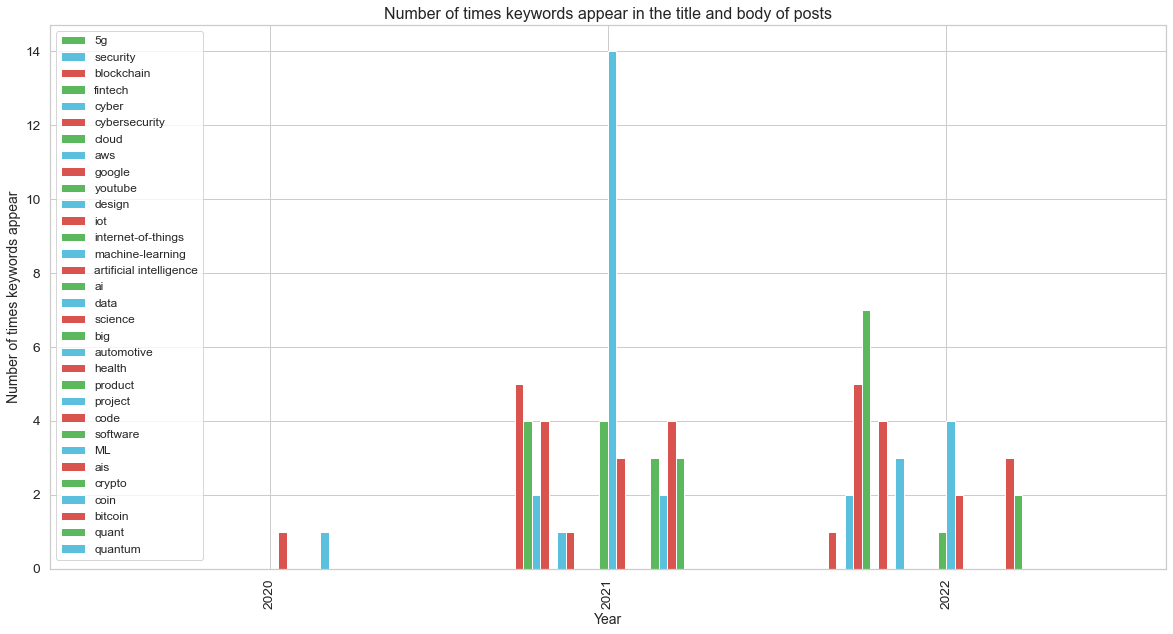

In [93]:
df

# combine title and body into one column
new_df = pd.DataFrame(df, columns=['words', 'year'])
new_df['words'] = df['description_processed2']
new_df

tech_keywords = ['5g', 'security', 'blockchain', 'fintech', 'cyber', 'cybersecurity', 'cloud', 'aws', 'google', 'youtube', 'design', 
                 'iot', 'internet-of-things', 'machine-learning', 'artificial intelligence', 'ai', 'data', 'science', 'big',
                 'automotive', 'health', 'product', 'project', 'code', 'software', 'ML', 'ais', 'crypto', 'coin', 'bitcoin', 'quant', 'quantum']

# loop through keywords and count the number of times it appears in the words column
for i in tech_keywords:
    new_df[i] = new_df['words'].apply(lambda x: x.count(i))
new_df

# group by year and sum the number of times each keyword appears
new_df = new_df.groupby('year').sum()
new_df

# plot the data
new_df.plot(kind='bar', figsize=(20,10), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'])
plt.title('Number of times keywords appear in the title and body of posts', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of times keywords appear', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [82]:
df

,Hackathon Name,Description,Hackathon_type,year,description_processed,description_processed2
0,DSC Solution Challenge 2021,The Google Developer Student Clubs - 2021 Solu...,Type: Software Development,2021,the google developer student clubs - 2021 solu...,"[google, developer, student, clubs, solution, ..."
1,The Data Open 2021,"Citadel is proud to present The Data Open, a d...",Type: Quant,2021,citadel is proud to present the data open a da...,"[citadel, proud, present, data, open, datathon..."
2,Shopee Code League 2021,Shopee Code League is a 3-week coding challeng...,Type: Data Science,2021,shopee code league is a 3-week coding challeng...,"[shopee, code, league, week, coding, challenge..."
3,AIfinity Hackathon,Want to apply Machine Learning and Artificial ...,Type: Machine Learning,2021,want to apply machine learning and artificial ...,"[want, apply, machine, learning, artificial, i..."
4,iNTUition V7.0,IEEE NTU Student Branch is pleased to announce...,Type: Product Development,2021,ieee ntu student branch is pleased to announce...,"[ieee, ntu, student, branch, pleased, announce..."
...,...,...,...,...,...,...
79,Seagate Lyve Innovator of the Year 2022,"Calling startups and entrepreneurs, take the s...",Type: Innovation,2022,calling startups and entrepreneurs take the st...,"[calling, startups, entrepreneurs, take, stage..."
80,PSA Code Sprint 2022,PSA proudly presents PSA Hackathon 2022 ! Come...,Type: Solution Development,2022,psa proudly presents psa hackathon 2022 come ...,"[psa, proudly, presents, psa, hackathon, come,..."
81,Digital Futurist Challenge 2022,The Digital Futurist Challenge calls out to al...,Type: Innovation,2022,the digital futurist challenge calls out to al...,"[digital, futurist, challenge, calls, youths, ..."
82,NCS Next Hack 2022,NCS Group is delighted to announce the launch ...,Type: Innovation,2022,ncs group is delighted to announce the launch ...,"[ncs, group, delighted, announce, launch, late..."


In [94]:
keywords = []
for word in df['Hackathon_type']:
    if word[6::].strip() not in keywords:
        keywords.append(word[6::].strip())
print(keywords)

['Software Development', 'Quant', 'Data Science', 'Machine Learning', 'Product Development', 'CyberSecurity', 'Algorithm', 'Data Analytics', 'Engineering', 'Innovation', 'Mobile App Development', 'Capture-The-Flag (CTF)', 'Extended Reality', 'Solution Development', 'High-Performance Computing', 'Sustainable Mobility', 'Radiation Engineering', 'Legal', 'Green Insurance', 'Accounting', 'Social Solution', 'Supply Chain', 'Ideathon', 'Cyber Security', 'Food, Innovation & Technology', 'API Development', 'Game Development', 'Blockchain', 'Healthcare', 'Algorithms', 'Entrepreneurship', 'Cloud Technologies', 'Legal Technology', 'Sustainability']
